# Question 1 - What is the BEST / MOST ACCURATE Quantifier to ouput for the user based upon their input?

# Question 2 - How would I go about QUANTIFYING relevance in this use case?

# Making a Simple Working Version With Cleaned Data (Hard Skills Only)

In [ ]:
import pandas as pd

# Load dataset (Ensure the CSV is uploaded to your Google Colab environment)
df = pd.read_csv("it_jobs_with_skills.csv")

# Keep only necessary columns
df = df[['job_title', 'job_summary', 'extracted_skills']]

# Convert extracted_skills column into lists
df['extracted_skills'] = df['extracted_skills'].apply(lambda x: [skill.strip().lower() for skill in x.split(',')] if isinstance(x, str) else [])

# Prompt user for skills
user_input = input("Enter a list of skills, separated by commas: ").strip().lower()
user_skills = [skill.strip() for skill in user_input.split(',')]

# Filtering function
def skill_match(row):
    matched_skills = [skill for skill in user_skills if skill in row['extracted_skills']]
    return len(matched_skills) >= len(user_skills) / 2  # At least half should match

# Apply filtering
filtered_df = df[df.apply(skill_match, axis=1)]

# Display results
if not filtered_df.empty:
    print(filtered_df[['job_title', 'job_summary', 'extracted_skills']].to_string(index=False))
else:
    print("No matching jobs found.")


Enter a list of skills, separated by commas: Java, Python, SQL, Databases, Hadoop, Javascript, Webdesign, Websites
                                                    job_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

# Second Iteration (Improved Output and Incorporated Seniority Level)

In [ ]:
import re
from collections import Counter

# Load dataset
df = pd.read_csv("it_jobs_with_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset to include only relevant seniority levels
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only required columns
df = df[["job_title", "job_summary", "extracted_skills"]]

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 25 skills
skill_counts = Counter(all_skills)
top_skills = list(dict(skill_counts.most_common(25)).keys())  # Remove duplicates while keeping order

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to recommend jobs based on user input
def recommend_jobs(user_skills):
    # Normalize user input (lowercase, strip spaces)
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}

    # Filter jobs based on skills matching at least half of user's input
    matching_jobs = df[df["extracted_skills"].apply(
        lambda skills: sum(skill.strip().lower() in user_skills for skill in str(skills).split(',')) >= len(user_skills) / 2
    )]

    # Format and display results
    if not matching_jobs.empty:
        matching_jobs["job_title"] = matching_jobs["job_title"].apply(clean_title)  # Clean titles
        print("\nMatching Job Listings:\n")
        print(matching_jobs[["job_title", "job_summary", "extracted_skills"]].to_string(index=False, justify="center"))
    else:
        print("\nNo matching jobs found.")

# Display top skills and get user input
print("Popular Skills:", ", ".join(top_skills))
user_input = input("\nEnter your skills (comma-separated) from the list above or add your own: ")
recommend_jobs(user_input)


Popular Skills: sql, agile, java, aws, python, javascript, git, programming, excel, azure, linux, ai, html, r, server, cybersecurity, css, scrum, docker, kubernetes, big data, machine learning, data science, back-end, iot

Enter your skills (comma-separated) from the list above or add your own: sql, aws, linux, server, cybersecurity, css, scrum, docker, big data, machine learning

Matching Job Listings:

                    job_title                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

<ipython-input-7-929c0b1a3143>:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  matching_jobs["job_title"] = matching_jobs["job_title"].apply(clean_title)  # Clean titles


# Third Iteration (Cleaner Display and Visualized Output)

Popular Skills: sql, agile, java, aws, python, javascript, git, programming, excel, azure, linux, ai, html, r, server, cybersecurity, css, scrum, docker, kubernetes, big data, machine learning, data science, back-end, iot

Enter your skills (comma-separated) from the list above or add your own: excel, azure, linux, cybersecurity


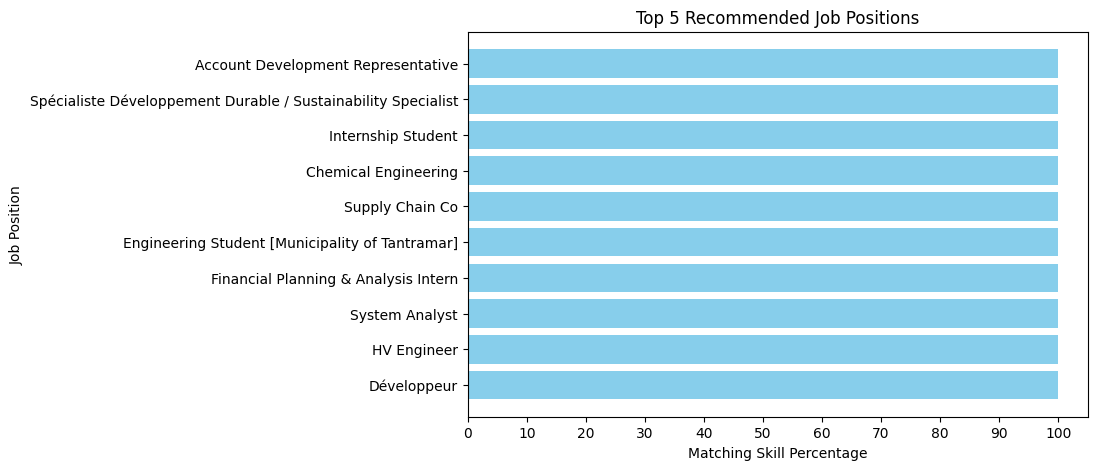

In [ ]:
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("it_jobs_with_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset to include only relevant seniority levels
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only required columns
df = df[["job_title", "job_summary", "extracted_skills"]]

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 25 skills
skill_counts = Counter(all_skills)
top_skills = list(dict(skill_counts.most_common(25)).keys())  # Remove duplicates while keeping order

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to recommend jobs based on user input
def recommend_jobs(user_skills):
    # Normalize user input (lowercase, strip spaces)
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}

    job_matches = []

    # Calculate proportion of matched skills for each job
    for _, row in df.iterrows():
        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)  # Proportion of matching skills
            job_matches.append((clean_title(row["job_title"]), proportion))

    # Sort jobs by highest proportion and get top 10
    top_jobs = sorted(job_matches, key=lambda x: x[1], reverse=True)[:10]

    if top_jobs:
        # Extract job titles and proportions
        job_titles, proportions = zip(*top_jobs)
        percentages = [p * 100 for p in proportions]  # Convert to percentage

        # Plot bar graph
        plt.figure(figsize=(8, 5))
        plt.barh(job_titles, percentages, color="skyblue")
        plt.xlabel("Matching Skill Percentage")
        plt.ylabel("Job Position")
        plt.title("Top 10 Recommended Positions")
        plt.gca().invert_yaxis()  # Invert y-axis to have the best match at the top
        plt.xticks(range(0, 101, 10))  # Set percentage axis ticks
        plt.show()
    else:
        print("\nNo matching jobs found.")

# Display top skills and get user input
print("Popular Skills:", ", ".join(top_skills))
user_input = input("\nEnter your skills (comma-separated) from the list above or add your own: ")
recommend_jobs(user_input)


# Presentable Iteration (Cleaned Output and Interface)

Popular Skills: sql, java, agile, aws, javascript, python, git, linux, azure, programming, html, css, server, ai, docker, kubernetes, scrum, r, excel, data science, machine learning, back-end, cybersecurity, nosql, google cloud

Enter your skills (comma-separated) from the list above or add your own: sql, java, javascript, R, matlab, html, css, AI, docker, python 


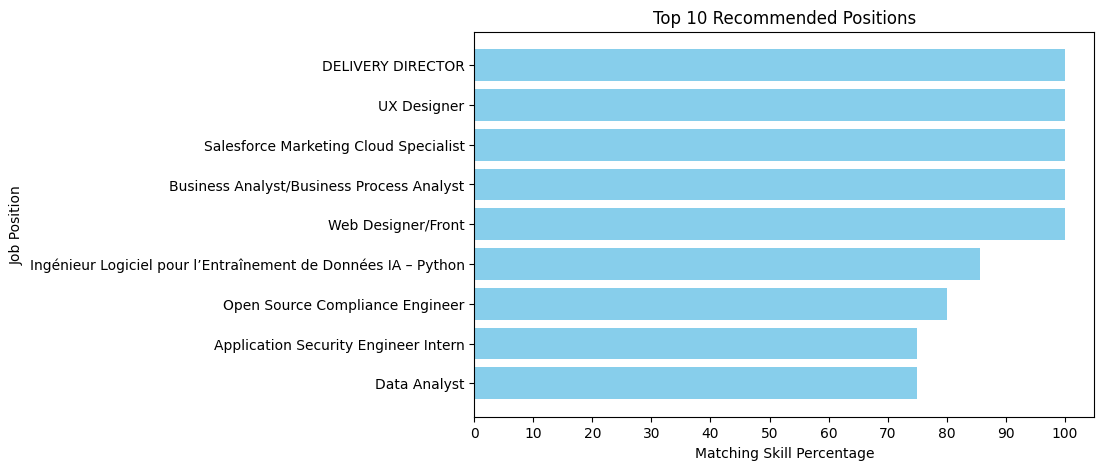


Recommended Positions:

+---------------------------------------------------------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate  # For clean table formatting

# Load dataset
df = pd.read_csv("it_jobs_with_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset: Remove non-entry-level jobs
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only relevant columns
df = df[["job_title", "job_summary", "extracted_skills"]]

# Remove listings with 0-3 skills
df["skill_count"] = df["extracted_skills"].apply(lambda x: len(str(x).split(',')))
df = df[df["skill_count"] > 3].drop(columns=["skill_count"])

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 25 skills
skill_counts = Counter(all_skills)
top_skills = list(dict(skill_counts.most_common(25)).keys())  # Remove duplicates while keeping order

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to recommend jobs based on user input
def recommend_jobs(user_skills):
    # Normalize user input (lowercase, strip spaces)
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}

    job_matches = []

    # Calculate proportion of matched skills for each job
    for _, row in df.iterrows():
        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)  # Proportion of matching skills
            job_matches.append((clean_title(row["job_title"]), row["job_summary"], proportion))

    # Sort jobs by highest proportion and get top 10
    top_jobs = sorted(job_matches, key=lambda x: x[2], reverse=True)[:10]

    if top_jobs:
        # Extract job titles, summaries, and proportions
        job_titles, job_summaries, proportions = zip(*top_jobs)
        percentages = [p * 100 for p in proportions]  # Convert to percentage

        # Plot bar graph
        plt.figure(figsize=(8, 5))
        plt.barh(job_titles, percentages, color="skyblue")
        plt.xlabel("Matching Skill Percentage")
        plt.ylabel("Job Position")
        plt.title("Top 10 Recommended Positions")
        plt.gca().invert_yaxis()  # Invert y-axis to have the best match at the top
        plt.xticks(range(0, 101, 10))  # Set percentage axis ticks
        plt.show()

        # Display job details as a table
        print("\nRecommended Positions:\n")
        table_data = list(zip(job_titles, job_summaries))
        print(tabulate(table_data, headers=["Job Title", "Job Description"], tablefmt="grid"))
    else:
        print("\nNo matching jobs found.")

# Display top skills and get user input
print("Popular Skills:", ", ".join(top_skills))
user_input = input("\nEnter your skills (comma-separated) from the list above or add your own: ")
recommend_jobs(user_input)


# Adding A Job-Degree Column

Defining singular DF's for each Degree from Michelle's Data

Software Development :

In [ ]:
import pandas as pd

# Define data for Software Development
sd_data = {
    'Keyword': ["AI", "Go", "Dev", "Management", "Development", "Project", "Technology", "AWS", "Git", "Rust", "SQL", "Cloud", "Python", "Developer", "Agile", "Java", "iOS", "Azure", "React", "JavaScript", "C++", "Windows", "Oracle", "C#", "Linux", "Scrum", "Docker", "HTML", "Project Manager", "CI/CD"],
    'Count': [2484, 1871, 1821, 1355, 1322, 1037, 822, 607, 601, 415, 366, 322, 272, 251, 243, 222, 221, 146, 139, 116, 109, 100, 94, 93, 86, 80, 78, 77, 75, 75]
}

sd_jobs = {
    'Keyword': ["Developer", "Software Engineer", "Software Developer", "Project Manager", "Data Scientist", "Cloud", "Automation Engineer", "Data Engineer", "Full Stack Engineer", "DevOps Engineer", "Backend Developer", "QA", "Security Engineer", "Systems Engineer", "Full Stack Developer", "Application Developer", "Cloud Engineer", "AI Engineer", "Web Developer", "QA Engineer"],
    'Count': [106, 86, 32, 30, 29, 24, 23, 23, 11, 8, 7, 5, 5, 5, 4, 3, 3, 3, 3, 2]
}

sd_soft_skills = {
    'Keyword': ["Communication", "Flexible", "Leadership", "Innovative", "Collaboration", "Driven", "Attention to Detail", "Problem-Solving", "Creative", "Flexibility", "Determined", "Teamwork", "Problem Solving", "Time Management", "Creativity", "Continuous Learning", "Self-Motivated", "Critical Thinking", "Adaptability", "Prioritization"],
    'Count': [1366, 817, 625, 537, 436, 401, 343, 286, 279, 267, 250, 148, 140, 103, 97, 94, 72, 59, 41, 39]
}

# Create DataFrames
sd_keyword_df = pd.DataFrame(sd_data)
sd_jobs_df = pd.DataFrame(sd_jobs)
sd_soft_df = pd.DataFrame(sd_soft_skills)

# Combine all three into a single DataFrame
sd_combined_df = pd.concat([sd_keyword_df, sd_jobs_df, sd_soft_df])

# Normalize keyword case and aggregate counts
sd_combined_df['Keyword'] = sd_combined_df['Keyword'].str.lower()
sd_combined_df = sd_combined_df.groupby('Keyword', as_index=False).sum()

# Display the final DataFrame
sd_combined_df.head(20)


,Keyword,Count
0,adaptability,41
1,agile,243
2,ai,2484
3,ai engineer,3
4,application developer,3
5,attention to detail,343
6,automation engineer,23
7,aws,607
8,azure,146
9,backend developer,7


Data Analyst :

In [ ]:
import pandas as pd

# Define individual DataFrames
da_keyword_df = pd.DataFrame({
    "Keyword": ["R", "AI", "Excel", "SQL", "Python", "SAS", "Classification", "Machine Learning", "JavaScript",
                "Oracle", "Tableau", "Artificial Intelligence", "Power BI", "Spark", "NoSQL", "MySQL", "Data Mining",
                "Kafka", "Databricks", "Statistical Analysis", "Google Sheets", "PostgreSQL", "Data Warehousing",
                "Data Pipelines", "Pandas", "Snowflake", "PyTorch", "VBA", "MongoDB", "TensorFlow"],
    "Count": [2571, 2484, 1306, 366, 272, 236, 160, 124, 116, 94, 87, 79, 66, 51, 48, 46, 36, 35, 35, 33, 31, 30,
              29, 27, 25, 20, 18, 18, 17, 17]
})

da_jobs_df = pd.DataFrame({
    "Keyword": ["Data Analyst", "Product Manager", "Data Scientist", "Data Engineer", "Financial Analyst",
                "Business Intelligence", "Machine Learning", "Business Intelligence Analyst", "Operations Analyst",
                "Data Architect", "BI Analyst", "Machine Learning Engineer", "Credit Risk Analyst", "Statistician",
                "Risk Analyst", "Power BI Analyst", "Data Specialist", "Reporting Analyst", "Fraud Analyst",
                "Investment Data Analyst"],
    "Count": [79, 76, 29, 23, 14, 13, 4, 4, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 0]
})

da_soft_df = pd.DataFrame({
    "Keyword": ["Communication", "Flexible", "Leadership", "Innovative", "Collaboration", "Driven", "Attention to Detail",
                "Presentation", "Problem-Solving", "Creative", "Visual", "Flexibility", "Determined", "Teamwork",
                "Problem Solving", "Decision-Making", "Time Management", "Creativity", "Self-Motivated",
                "Critical Thinking"],
    "Count": [1366, 817, 625, 537, 436, 401, 343, 323, 286, 279, 277, 267, 250, 148, 140, 118, 103, 97, 72, 59]
})

# Merge the DataFrames by summing the counts of matching keywords
da_combined_df = pd.concat([da_keyword_df, da_jobs_df, da_soft_df]).groupby("Keyword", as_index=False).sum()

# Display the final combined DataFrame
da_combined_df.head(20)


,Keyword,Count
0,AI,2484
1,Artificial Intelligence,79
2,Attention to Detail,343
3,BI Analyst,2
4,Business Intelligence,13
5,Business Intelligence Analyst,4
6,Classification,160
7,Collaboration,436
8,Communication,1366
9,Creative,279


Data Scientist :

In [ ]:
import pandas as pd

# Define individual DataFrames
ds_keyword_df = pd.DataFrame({
    "Keyword": ["R", "AI", "AWS", "SQL", "Scala", "Python", "Java", "Optimization", "Azure", "Machine Learning",
                "C++", "Tableau", "Docker", "Kubernetes", "Power BI", "NoSQL", "MySQL", "BERT", "Databricks",
                "PostgreSQL"],
    "Count": [2571, 2484, 607, 366, 297, 272, 222, 186, 146, 124, 109, 87, 78, 70, 66, 48, 46, 45, 35, 30]
})

ds_jobs_df = pd.DataFrame({
    "Keyword": ["AI", "Data Scientist", "Data Engineer", "Principal Data Scientist", "Lead Data Scientist",
                "Machine Learning", "AI Engineer", "Cloud Engineer", "Data Architect", "Statistician",
                "Data Manager", "Machine Learning Engineer", "AI Researcher", "Environmental Data Scientist",
                "Bioinformatics Data Scientist", "Agricultural Data Scientist", "Pharmaceutical Data Scientist",
                "Statistical Data Scientist", "Healthcare Data Scientist", "Risk Data Scientist"],
    "Count": [221, 29, 23, 10, 4, 4, 3, 3, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
})

ds_soft_df = pd.DataFrame({
    "Keyword": ["Communication", "Flexible", "Leadership", "Innovative", "Collaboration", "Driven", "Presentation",
                "Problem-Solving", "Creative", "Visual", "Flexibility", "Determined", "Teamwork", "Problem Solving",
                "Time Management", "Creativity", "Self-Motivated", "Critical Thinking", "Business Acumen",
                "Storytelling"],
    "Count": [1366, 817, 625, 537, 436, 401, 323, 286, 279, 277, 267, 250, 148, 140, 103, 97, 72, 59, 51, 34]
})

# Merge the DataFrames by summing the counts of matching keywords
ds_combined_df = pd.concat([ds_keyword_df, ds_jobs_df, ds_soft_df]).groupby("Keyword", as_index=False).sum()

# Display the final combined DataFrame
ds_combined_df.head(20)


,Keyword,Count
0,AI,2705
1,AI Engineer,3
2,AI Researcher,0
3,AWS,607
4,Agricultural Data Scientist,0
5,Azure,146
6,BERT,45
7,Bioinformatics Data Scientist,0
8,Business Acumen,51
9,C++,109


Enterprise Systems :

In [ ]:
import pandas as pd

# Define individual DataFrames
es_keyword_df = pd.DataFrame({
    "Keyword": ["REST", "AWS", "Enterprise", "Python", "SAS", "Java", "SAP", "JavaScript", "Oracle", "C#",
                "Tableau", "Workday", "Docker", "CI/CD", "Kubernetes", "CRM", "Power BI", "ETL", "Salesforce",
                "Jenkins"],
    "Count": [840, 607, 275, 272, 236, 222, 120, 116, 94, 93, 87, 78, 78, 75, 70, 67, 66, 59, 52, 47]
})

es_jobs_df = pd.DataFrame({
    "Keyword": ["Project Manager", "Sales Analyst", "Systems Analyst", "Cloud Engineer", "Enterprise Architect",
                "Cloud Architect", "BI Analyst", "Systems Administrator", "Enterprise Compliance Officer",
                "Enterprise Software Developer", "Enterprise SOC Analyst", "Enterprise Cybersecurity Engineer",
                "Governance, Risk & Compliance (GRC) Analyst", "IAM Specialist", "Enterprise IT Administrator",
                "Enterprise Risk Analyst", "Enterprise Security Architect",
                "Identity and Access Management (IAM) Engineer", "Enterprise AI Engineer", "IT Infrastructure Engineer"],
    "Count": [30, 12, 8, 3, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

es_soft_df = pd.DataFrame({
    "Keyword": ["Communication", "Flexible", "Leadership", "Innovative", "Collaboration", "Driven",
                "Attention to Detail", "Presentation", "Project Management", "Problem-Solving", "Creative",
                "Visual", "Flexibility", "Determined", "Teamwork", "Problem Solving", "Decision-Making",
                "Time Management", "Creativity", "Self-Motivated"],
    "Count": [1366, 817, 625, 537, 436, 401, 343, 323, 292, 286, 279, 277, 267, 250, 148, 140, 118, 103, 97, 72]
})

# Merge the DataFrames by summing the counts of matching keywords
es_combined_df = pd.concat([es_keyword_df, es_jobs_df, es_soft_df]).groupby("Keyword", as_index=False).sum()

# Display the final combined DataFrame
es_combined_df.head(20)


,Keyword,Count
0,AWS,607
1,Attention to Detail,343
2,BI Analyst,2
3,C#,93
4,CI/CD,75
5,CRM,67
6,Cloud Architect,2
7,Cloud Engineer,3
8,Collaboration,436
9,Communication,1366


Systems and Security :

In [ ]:
import pandas as pd

# Define individual DataFrames
ss_keyword_df = pd.DataFrame({
    "Keyword": ["C", "Go", "IPS", "NIST", "Security", "Compliance", "Rust", "Python", "RSA", "IDS",
                "JavaScript", "C++", "Cybersecurity", "CEH", "Code Review", "Risk Management",
                "Risk Assessment", "IAM", "Bash", "HIPAA"],
    "Count": [2571, 1871, 684, 614, 586, 539, 415, 272, 148, 121,
              116, 109, 79, 77, 70, 61, 41, 36, 32, 27]
})

ss_jobs_df = pd.DataFrame({
    "Keyword": ["Systems Analyst", "Systems Engineer", "Threat Intelligence Analyst", "Application Security Engineer",
                "Security Analyst", "DevSecOps Engineer", "Information Security", "Security Consultant",
                "IT Risk Analyst", "Risk Analyst", "Cybersecurity Engineer", "IT Security Analyst", "Firewall Engineer",
                "Security Solutions Architect", "Forensic Analyst", "Incident Response Analyst", "VP of Security",
                "Director of Security", "Head of Cybersecurity", "CISO (Chief Information Security Officer)"],
    "Count": [8, 5, 4, 2, 2, 2, 1, 1, 1, 1,
              1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
})

ss_soft_df = pd.DataFrame({
    "Keyword": ["Communication", "Leadership", "Innovative", "Collaboration", "Attention to Detail",
                "Integrity", "Problem-Solving", "Flexibility", "Problem Solving", "Awareness",
                "Ethical", "Honest", "Critical Thinking", "Adaptability", "Risk Assessment",
                "Honesty", "Works well under pressure", "Awareness of Compliance & Regulations",
                "Risk Assessment & Decision-Making", "Confidentiality & Discretion"],
    "Count": [1366, 625, 537, 436, 343, 302, 286, 267, 140, 123,
              92, 83, 59, 41, 41, 39, 2, 0, 0, 0]
})

# Merge the DataFrames by summing the counts of matching keywords
ss_combined_df = pd.concat([ss_keyword_df, ss_jobs_df, ss_soft_df]).groupby("Keyword", as_index=False).sum()

# Display the final combined DataFrame
ss_combined_df.head(20)


,Keyword,Count
0,Adaptability,41
1,Application Security Engineer,2
2,Attention to Detail,343
3,Awareness,123
4,Awareness of Compliance & Regulations,0
5,Bash,32
6,C,2571
7,C++,109
8,CEH,77
9,CISO (Chief Information Security Officer),0


Digital Media :

In [ ]:
import pandas as pd

# Define individual DataFrames
dm_keyword_df = pd.DataFrame({
    "Keyword": ["UI", "Design", "SEM", "Marketing", "UX", "JavaScript", "Tableau", "Social Media", "HTML", "Data Visualization",
                "CSS", "Adobe", "User Experience", "Storytelling", "SEO", "Creative Director", "E-commerce", "Digital Marketing",
                "NFTs", "Technical Writing"],
    "Count": [2483, 1120, 745, 278, 275, 116, 87, 85, 77, 66,
              60, 46, 38, 34, 32, 29, 28, 25, 22, 19]
})

dm_jobs_df = pd.DataFrame({
    "Keyword": ["UI", "Design", "Marketing", "UX", "UX/UI Designer", "Web Designer", "Technical Writer", "User Experience",
                "Digital Designer", "Community Manager", "Copywriter", "Digital Media Specialist", "Digital Analytics Specialist",
                "E-commerce Specialist", "Web Producer", "Conversion Rate Optimization (CRO) Specialist", "SEO Analyst",
                "UX Writer", "E-commerce Marketing Manager", "Digital Experience Manager"],
    "Count": [51, 33, 31, 16, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

dm_soft_df = pd.DataFrame({
    "Keyword": ["Collaboration", "Attention to Detail", "Project Management", "Problem-Solving", "Creative", "Teamwork",
                "Creativity", "Self-Motivated", "Decision Making", "Inspired", "Insightful", "Adaptability to Trends & Platforms",
                "Communication & Branding", "Data-Driven Decision-Making (SEO, Social Media...)", "Collaboration & Teamwork",
                "Visual Thinking", "Storytelling & Narrative Skills", "Persuasion & Marketing Insight",
                "Emotional Intelligence (Understanding Audience...)", "Time Management & Deadlines"],
    "Count": [436, 343, 292, 286, 279, 148, 97, 72, 64, 35,
              11, 0, 0, 0, 0, 0, 0, 0, 0, 0]
})

# Merge the DataFrames by summing the counts of matching keywords
dm_combined_df = pd.concat([dm_keyword_df, dm_jobs_df, dm_soft_df]).groupby("Keyword", as_index=False).sum()

# Display the final combined DataFrame
dm_combined_df.head(20)


,Keyword,Count
0,Adaptability to Trends & Platforms,0
1,Adobe,46
2,Attention to Detail,343
3,CSS,60
4,Collaboration,436
5,Collaboration & Teamwork,0
6,Communication & Branding,0
7,Community Manager,1
8,Conversion Rate Optimization (CRO) Specialist,0
9,Copywriter,1


In [ ]:
import pandas as pd

# Dictionary mapping degree names to their corresponding DataFrames
degree_dfs = {
    "Software Development": [sd_keyword_df, sd_jobs_df, sd_soft_df],
    "Data Analyst": [da_keyword_df, da_jobs_df, da_soft_df],
    "Data Scientist": [ds_keyword_df, ds_jobs_df, ds_soft_df],
    "Enterprise Systems": [es_keyword_df, es_jobs_df, es_soft_df],
    "Systems and Security": [ss_keyword_df, ss_jobs_df, ss_soft_df],
    "Digital Media": [dm_keyword_df, dm_jobs_df, dm_soft_df]
}

# Dictionary to store the combined DataFrame for each degree
combined_degree_dfs = {}

# Process each degree
for degree, dfs in degree_dfs.items():
    combined_df = pd.concat(dfs)  # Concatenate all DataFrames for the degree
    combined_df = combined_df.groupby("Keyword", as_index=False)["Count"].sum()  # Sum counts for duplicate keywords
    combined_df["Keyword"] = combined_df["Keyword"].str.lower()  # Convert keywords to lowercase for consistency
    combined_degree_dfs[degree] = combined_df  # Store in dictionary

# Example: Access the combined DataFrame for Software Development
combined_degree_dfs["Software Development"].head()


,Keyword,Count
0,ai,2484
1,ai engineer,3
2,aws,607
3,adaptability,41
4,agile,243


Categorizing Based Upon Proportions of the Occurrances of Keywords

Initial Approach - By ONLY Count of Keywords in each degree

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("merged_jobs_cleaned (3)(in).csv")

# Define the keyword dictionaries for each degree
degree_keywords = {
    "Data Analyst": ["Python", "SQL", "R", "Tableau", "Excel", "Power BI", "Machine Learning", "Data Mining"],
    "Data Scientist": ["Python", "R", "SQL", "Machine Learning", "Deep Learning", "AWS", "Azure", "TensorFlow", "PyTorch"],
    "Enterprise Systems": ["SAP", "AWS", "Java", "C#", "REST", "ETL", "CRM", "Power BI", "Tableau"],
    "Systems and Security": ["Cybersecurity", "C", "C++", "Go", "Security", "Risk Management", "IAM", "Compliance"],
    "Digital Media": ["UI", "UX", "Design", "Marketing", "SEO", "JavaScript", "Social Media", "Storytelling"]
}

# Function to count keyword occurrences in a given text
def count_keywords(text, keywords):
    if pd.isna(text):  # Handle NaN values
        return 0
    text = text.lower()
    return sum(text.count(keyword.lower()) for keyword in keywords)

# Process each job listing
degree_counts = []  # Store keyword count results

for _, row in df.iterrows():
    title = str(row["job_title"])  # Convert to string in case of NaN
    description = str(row["job_description"])

    degree_score = {}  # Store keyword count per degree

    for degree, keywords in degree_keywords.items():
        title_count = count_keywords(title, keywords)
        description_count = count_keywords(description, keywords)
        degree_score[degree] = title_count + description_count

    # Determine the degree with the highest keyword occurrences
    best_degree = max(degree_score, key=degree_score.get)
    degree_counts.append(best_degree)

# Assign results to a new column
df["degree_category"] = degree_counts

# Save the updated DataFrame
df.to_csv("merged_jobs_with_degrees.csv", index=False)

print("Degree categorization completed! File saved as 'merged_jobs_with_degrees.csv'.")

df.head(20)



Degree categorization completed! File saved as 'merged_jobs_with_degrees.csv'.


,company_name,job_title,job_seniority_level,job_function,job_industries,job_description,company_industry,company_sector,job_type,degree_category
0,10 Percent Recruiting Ltd.,Business Intelligence Analyst,Mid-Senior level,Information Technology and Analyst,Financial Services and Data Infrastructure and...,Job Title: Business Intelligence (BI) Analyst ...,NaN,NaN,Contract,Data Analyst
1,1199SEIU Family of Funds,Senior .Net Developer,NaN,NaN,NaN,Requisition #:\n6755\n# of openings:\n1\nEmplo...,Health Care Services & Hospitals,Healthcare,NaN,Data Analyst
2,360 Technology,Full Stack Engineer,Mid-Senior level,Information Technology,"IT Services and IT Consulting, Banking, and Fi...",Role- Full Stack Lead We are looking for a hig...,NaN,NaN,Full-time,Data Scientist
3,3M,Product Development Specialist,NaN,NaN,NaN,Job Description:\n Product Development ...,NaN,NaN,Full-time,Data Analyst
4,4AG Robotics,Intermediate Computer Vision Developer,Associate,Engineering and Science,Robotics Engineering,We are seeking an Intermediate Computer Vision...,NaN,NaN,Full-time,Data Analyst
5,7-ELEVEN,Assistant Store Leader (Assistant Manager),NaN,NaN,NaN,Retail Assistant Manager If you enjoy workin...,NaN,NaN,Full-time,Data Analyst
6,7-ELEVEN,Assistant Store Leader (Assistant Manager),NaN,NaN,NaN,Retail Assistant Manager If you enjoy workin...,NaN,NaN,Full-time,Data Analyst
7,7-ELEVEN,Restaurant Crew,NaN,NaN,NaN,Restaurant Team Member Are you looking for a...,NaN,NaN,"Part-time, Full-time",Data Analyst
8,7-ELEVEN,Store Crew,NaN,NaN,NaN,Retail Sales Associate Crew positions are en...,NaN,NaN,"Part-time, Full-time",Data Analyst
9,7-ELEVEN,Store Crew,NaN,NaN,NaN,Retail Sales Associate Crew positions are en...,NaN,NaN,"Part-time, Full-time",Data Analyst


Secondary Approach - By Count AND Proportion of Degree

In [ ]:
import pandas as pd

def categorize_by_degree_proportion(df, degree_keywords):
    degree_match_proportions = {degree: [] for degree in degree_keywords}
    assigned_degrees = []

    for _, row in df.iterrows():
        job_text = f"{row['job_title']} {row['job_description']}".lower()
        degree_proportions = {}

        for degree, keywords in degree_keywords.items():
            unique_keywords_found = set(k for k in keywords if k in job_text)
            proportion = len(unique_keywords_found) / len(keywords) if keywords else 0
            degree_match_proportions[degree].append(proportion)
            degree_proportions[degree] = proportion

        best_degree = max(degree_proportions, key=degree_proportions.get, default=None)
        assigned_degrees.append(best_degree)

    for degree in degree_keywords:
        df[f"{degree}_match_proportion"] = degree_match_proportions[degree]

    df["assigned_degree"] = assigned_degrees

    return df

# Display the first 20 rows to check the new categorization
print(df.head(20))

# Save the modified dataframe to a CSV file
output_filename = "merged_jobs_with_degree_category.csv"
df.to_csv(output_filename, index=False)

print(f"File saved as {output_filename}")

# Example usage
# df = pd.read_csv("merged_jobs_cleaned.csv")
# degree_keywords = {"Software Development": software_dev_keywords, "Data Analyst": data_analyst_keywords, ...}
# df = categorize_by_degree_proportion(df, degree_keywords)
# df.to_csv("categorized_jobs.csv", index=False)


                  company_name                                   job_title  \
0   10 Percent Recruiting Ltd.               Business Intelligence Analyst   
1     1199SEIU Family of Funds                       Senior .Net Developer   
2               360 Technology                         Full Stack Engineer   
3                           3M              Product Development Specialist   
4                 4AG Robotics      Intermediate Computer Vision Developer   
5                     7-ELEVEN  Assistant Store Leader (Assistant Manager)   
6                     7-ELEVEN  Assistant Store Leader (Assistant Manager)   
7                     7-ELEVEN                             Restaurant Crew   
8                     7-ELEVEN                                  Store Crew   
9                     7-ELEVEN                                  Store Crew   
10                         ABB                  Drives Electrical Engineer   
11                         ABB                  Drives Electrica

Running Program Again on IT_Skills_Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("it_jobs_with_skills.csv")

# Define the keyword dictionaries for each degree
degree_keywords = {
    "Data Analyst": ["Python", "SQL", "R", "Tableau", "Excel", "Power BI", "Machine Learning", "Data Mining"],
    "Data Scientist": ["Python", "R", "SQL", "Machine Learning", "Deep Learning", "AWS", "Azure", "TensorFlow", "PyTorch"],
    "Enterprise Systems": ["SAP", "AWS", "Java", "C#", "REST", "ETL", "CRM", "Power BI", "Tableau"],
    "Systems and Security": ["Cybersecurity", "C", "C++", "Go", "Security", "Risk Management", "IAM", "Compliance"],
    "Digital Media": ["UI", "UX", "Design", "Marketing", "SEO", "JavaScript", "Social Media", "Storytelling"]
}

# Function to count keyword occurrences in a given text
def count_keywords(text, keywords):
    if pd.isna(text):  # Handle NaN values
        return 0
    text = text.lower()
    return sum(text.count(keyword.lower()) for keyword in keywords)

# Process each job listing
degree_counts = []  # Store keyword count results

for _, row in df.iterrows():
    title = str(row["job_title"])  # Convert to string in case of NaN
    description = str(row["job_summary"])

    degree_score = {}  # Store keyword count per degree

    for degree, keywords in degree_keywords.items():
        title_count = count_keywords(title, keywords)
        description_count = count_keywords(description, keywords)
        degree_score[degree] = title_count + description_count

    # Determine the degree with the highest keyword occurrences
    best_degree = max(degree_score, key=degree_score.get)
    degree_counts.append(best_degree)

# Assign results to a new column
df["degree_category"] = degree_counts

# Save the updated DataFrame
df.to_csv("merged_jobs_with_degrees_and_skills.csv", index=False)

print("Degree categorization completed! File saved as 'merged_jobs_with_degrees_and_skills.csv'.")

df.head(20)



Degree categorization completed! File saved as 'merged_jobs_with_degrees_and_skills.csv'.


,job_title,company_name,job_location,job_summary,job_seniority_level,job_function,job_employment_type,job_industries,application_availability,job_type,description,job_overview,company_industry,company_type,company_sector,extracted_skills,degree_category
0,Software Developer - Driver and Vehicle,"Canadian Bank Note Company, Limited","Ottawa, Ontario, Canada",Description Internal Job Title : Software Deve...,Entry level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, Git, Agile, Scrum, agile, server, git, j...",Data Analyst
1,API Developer,Venngo Inc.,"Toronto, Ontario, Canada","Who we are At Venngo, we provide premium disco...",Associate,Engineering and Information Technology,Full-time,Marketing Services,True,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, AWS, Git, Agile, AI, agile, git, aws, sql...",Data Scientist
2,.Net Developer,BLAZESOFT,"Vaughan, Ontario, Canada",Join our dynamic and innovative gaming company...,Mid-Senior level,Other,Full-time,Gambling Facilities and Casinos,True,NaN,NaN,NaN,NaN,NaN,NaN,"NoSQL, Docker, Kubernetes, back-end, programming",Data Analyst
3,Power BI Analyst,Alquemy Search & Consulting,"Calgary, Alberta, Canada","Power BI Analyst 12 month contract, potential ...",Mid-Senior level,Information Technology,Contract,Equipment Rental Services,True,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, Machine Learning, sql",Data Analyst
4,Scala Software Engineer - Backend,Avetta,Canada,Avetta is Hiring a Scala Software Engineer - B...,Mid-Senior level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, JavaScript, Agile, javascript, agile, ja...",Data Analyst
5,DO - Reconditioning Specialist,Canadian Forces Morale and Welfare Services,"Edmonton, Alberta, Canada",WHO WE ARE CFMWS. A job with purpose. Our 4000...,Entry level,Other,Full-time,Wellness and Fitness Services,True,NaN,NaN,NaN,NaN,NaN,NaN,programming,Data Analyst
6,"Software Engineer, Fullstack",Vanta,"Vancouver, British Columbia, Canada","At Vanta, our mission is to secure the interne...",Entry level,Engineering and Information Technology,Full-time,Software Development,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Analyst
7,Senior Data Engineer,Ontario Power Generation,"Pickering, Ontario, Canada",Status: Regular Full Time Working Conditions: ...,Mid-Senior level,Administrative,Full-time,Utilities,True,NaN,NaN,NaN,NaN,NaN,NaN,"Python, SQL, Azure, Machine Learning, sql",Data Analyst
8,Back End Developer,Experience AI Solutions,"Montreal, Quebec, Canada",Senior Back-End Developer Start Date: Immediat...,Mid-Senior level,Engineering and Information Technology,Full-time,"Information Technology & Services, Airlines an...",True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, Docker, Kubernetes, Linux, linux, java, ...",Data Analyst
9,Security Engineer,Clover Health,Canada,Clover is reinventing health insurance by work...,Entry level,Information Technology,Full-time,Hospitals and Health Care,True,NaN,NaN,NaN,NaN,NaN,NaN,"Python, JavaScript, Linux, Cybersecurity, java...",Data Analyst


Altered to Include ALL Degrees

In [ ]:
import pandas as pd
import random

# Load the dataset
df = pd.read_csv("it_jobs_with_skills.csv")

# Define the keyword dictionaries for each degree
degree_keywords = {
    "Data Analyst": ["Python", "SQL", "R", "Tableau", "Excel", "Power BI", "Machine Learning", "Data Mining"],
    "Data Scientist": ["Python", "R", "SQL", "Machine Learning", "Deep Learning", "AWS", "Azure", "TensorFlow", "PyTorch"],
    "Enterprise Systems": ["SAP", "AWS", "Java", "C#", "REST", "ETL", "CRM", "Power BI", "Tableau"],
    "Systems and Security": ["Cybersecurity", "C", "C++", "Go", "Security", "Risk Management", "IAM", "Compliance"],
    "Digital Media": ["UI", "UX", "Design", "Marketing", "SEO", "JavaScript", "Social Media", "Storytelling"]
}

# Function to count keyword occurrences in a given text
def count_keywords(text, keywords):
    if pd.isna(text):  # Handle NaN values
        return 0
    text = text.lower()
    return sum(text.count(keyword.lower()) for keyword in keywords)

# Process each job listing
degree_counts = []  # Store keyword count results

for _, row in df.iterrows():
    title = str(row["job_title"])  # Convert to string in case of NaN
    description = str(row["job_summary"])

    degree_score = {}  # Store keyword count per degree

    for degree, keywords in degree_keywords.items():
        title_count = count_keywords(title, keywords)
        description_count = count_keywords(description, keywords)
        degree_score[degree] = title_count + description_count

    # Find the highest score
    max_score = max(degree_score.values())
    threshold = max_score * 0.95  # 5% range threshold

    # Get degrees within 5% of the highest score
    top_degrees = [degree for degree, score in degree_score.items() if score >= threshold]

    # Randomly select one of the top degrees
    selected_degree = random.choice(top_degrees)
    degree_counts.append(selected_degree)

# Assign results to a new column
df["degree_category"] = degree_counts

# Save the updated DataFrame
df.to_csv("merged_jobs_with_degrees_and_skills.csv", index=False)

print("Degree categorization completed! File saved as 'merged_jobs_with_degrees_and_skills.csv'.")

df.head(20)


Degree categorization completed! File saved as 'merged_jobs_with_degrees_and_skills.csv'.


,job_title,company_name,job_location,job_summary,job_seniority_level,job_function,job_employment_type,job_industries,application_availability,job_type,description,job_overview,company_industry,company_type,company_sector,extracted_skills,degree_category
0,Software Developer - Driver and Vehicle,"Canadian Bank Note Company, Limited","Ottawa, Ontario, Canada",Description Internal Job Title : Software Deve...,Entry level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, Git, Agile, Scrum, agile, server, git, j...",Data Scientist
1,API Developer,Venngo Inc.,"Toronto, Ontario, Canada","Who we are At Venngo, we provide premium disco...",Associate,Engineering and Information Technology,Full-time,Marketing Services,True,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, AWS, Git, Agile, AI, agile, git, aws, sql...",Data Analyst
2,.Net Developer,BLAZESOFT,"Vaughan, Ontario, Canada",Join our dynamic and innovative gaming company...,Mid-Senior level,Other,Full-time,Gambling Facilities and Casinos,True,NaN,NaN,NaN,NaN,NaN,NaN,"NoSQL, Docker, Kubernetes, back-end, programming",Data Analyst
3,Power BI Analyst,Alquemy Search & Consulting,"Calgary, Alberta, Canada","Power BI Analyst 12 month contract, potential ...",Mid-Senior level,Information Technology,Contract,Equipment Rental Services,True,NaN,NaN,NaN,NaN,NaN,NaN,"SQL, Machine Learning, sql",Data Scientist
4,Scala Software Engineer - Backend,Avetta,Canada,Avetta is Hiring a Scala Software Engineer - B...,Mid-Senior level,Engineering and Information Technology,Full-time,IT Services and IT Consulting,True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, JavaScript, Agile, javascript, agile, ja...",Data Analyst
5,DO - Reconditioning Specialist,Canadian Forces Morale and Welfare Services,"Edmonton, Alberta, Canada",WHO WE ARE CFMWS. A job with purpose. Our 4000...,Entry level,Other,Full-time,Wellness and Fitness Services,True,NaN,NaN,NaN,NaN,NaN,NaN,programming,Data Analyst
6,"Software Engineer, Fullstack",Vanta,"Vancouver, British Columbia, Canada","At Vanta, our mission is to secure the interne...",Entry level,Engineering and Information Technology,Full-time,Software Development,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Data Scientist
7,Senior Data Engineer,Ontario Power Generation,"Pickering, Ontario, Canada",Status: Regular Full Time Working Conditions: ...,Mid-Senior level,Administrative,Full-time,Utilities,True,NaN,NaN,NaN,NaN,NaN,NaN,"Python, SQL, Azure, Machine Learning, sql",Data Analyst
8,Back End Developer,Experience AI Solutions,"Montreal, Quebec, Canada",Senior Back-End Developer Start Date: Immediat...,Mid-Senior level,Engineering and Information Technology,Full-time,"Information Technology & Services, Airlines an...",True,NaN,NaN,NaN,NaN,NaN,NaN,"Java, Docker, Kubernetes, Linux, linux, java, ...",Data Analyst
9,Security Engineer,Clover Health,Canada,Clover is reinventing health insurance by work...,Entry level,Information Technology,Full-time,Hospitals and Health Care,True,NaN,NaN,NaN,NaN,NaN,NaN,"Python, JavaScript, Linux, Cybersecurity, java...",Data Scientist


Finding Average Proportion Allotted to Each Degree

In [ ]:
# Initialize a dictionary to store proportions per degree
degree_matches = {degree: [] for degree in degree_keywords.keys()}

# Loop through each job listing and calculate the proportion of detected keywords
for index, row in df.iterrows():
    job_text = (str(row["job_title"]) + " " + str(row["job_description"])).lower()

    # Calculate proportion of matched keywords per degree
    degree_proportions = {}
    for degree, keywords in degree_keywords.items():
        matched_keywords = set([kw for kw in keywords if kw.lower() in job_text])  # Unique matches
        proportion = len(matched_keywords) / len(keywords) if keywords else 0
        degree_proportions[degree] = proportion
        degree_matches[degree].append(proportion)

# Calculate and print the average proportion of detected keywords per degree
average_proportions = {degree: sum(proportions) / len(proportions) if proportions else 0
                       for degree, proportions in degree_matches.items()}

print("\nAverage proportion of detected keywords for each degree:")
for degree, avg in average_proportions.items():
    print(f"{degree}: {avg:.4f}")



Average proportion of detected keywords for each degree:
Data Analyst: 0.2375
Data Scientist: 0.1816
Enterprise Systems: 0.0948
Systems and Security: 0.2872
Digital Media: 0.2203


# Deliverable

In [ ]:
import pandas as pd
import json
import re
import random
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load dataset
df = pd.read_csv("merged_jobs_with_degrees_and_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset: Remove non-entry-level jobs
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only relevant columns
df = df[["job_title", "job_summary", "extracted_skills", "degree_category"]]

# Remove listings with 0-3 skills
df["skill_count"] = df["extracted_skills"].apply(lambda x: len(str(x).split(',')))
df = df[df["skill_count"] > 3].drop(columns=["skill_count"])

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 100 skills
skill_counts = Counter(all_skills)
top_100_skills = list(dict(skill_counts.most_common(100)).keys())

# Load courses from JSON file
with open("compiled_courses.json", "r") as f:
    course_data = json.load(f)

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to get relevant courses from different difficulty levels
def get_courses(degree_category):
    courses = list(course_data.get(degree_category, {}).items())
    categorized_courses = {"1000": [], "2000": [], "3000": [], "4000": []}

    for course_name, attributes in courses:
        match = re.search(r"(\d{4})", course_name)  # Extract course level
        if match:
            level = match.group(1)[0] + "000"  # Normalize to 1000, 2000, etc.
            if level in categorized_courses:
                categorized_courses[level].append((course_name, attributes))

    selected_courses = []
    for level in ["1000", "2000", "3000", "4000"]:
        if categorized_courses[level]:
            selected_courses.append(random.choice(categorized_courses[level]))  # Pick one per category

    return selected_courses[:3]  # Ensure we only return 3 courses

# Function to extract first sentence of job description
def get_first_sentence(description):
    return description.split('.')[0] + '.' if description else "No description available."

# Function to recommend jobs based on user input
def recommend_jobs(user_skills):
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}
    job_matches = []

    for _, row in df.iterrows():
        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)
            job_matches.append((clean_title(row["job_title"]), row["job_summary"], proportion, row["degree_category"], row["extracted_skills"]))

    # Sort jobs by highest proportion and get top 2 jobs
    top_jobs = sorted(job_matches, key=lambda x: x[2], reverse=True)[:2]

    if top_jobs:
        # Extract top degree category
        top_degree = top_jobs[0][3]
        courses = get_courses(top_degree)

        print("\nRecommended Degree:", top_degree)
        print("\nRelevant Courses:")
        course_table = []

        for course_name, attributes in courses:
            hard_skills = ", ".join(attributes["hard_skills"])
            course_table.append([course_name, hard_skills])

        print(tabulate(course_table, headers=["Course Name : ", "Required Skills : "], tablefmt="grid"))

        print("\nPosition Recommendations:")
        job_table = []

        for job in top_jobs:
            title, summary, _, _, skills = job
            job_table.append([title,  skills])

        print(tabulate(job_table, headers=["Job Title : ", "Taught Skills : "], tablefmt="grid"))
    else:
        print("\nNo matching jobs found.")

# Display randomly selected skills and get user input
random_skills = random.sample(top_100_skills, 10)
print("Recommendations :", ", ".join(random_skills))
user_input = input("\nEnter Skills to Accommodate (comma-separated): ")
recommend_jobs(user_input)


Recommendations : hadoop, blockchain, iot, node.js, deep learning, kotlin, git, kubernetes, azure, aws

Enter Skills to Accommodate (comma-separated): aws, hadoop, blockchain, iot, node, deep learning, kubernetes

Recommended Degree: Data Analyst

Relevant Courses:
+--------------------------------+---------------------------------------------+
| Course Name :                  | Required Skills :                           |
+================================+=============================================+
| DATA 1501 - Intro Data Science | Python, Data Analysis, Microsoft Excel      |
+--------------------------------+---------------------------------------------+
| ITEC 2120 - Intro Programming  | Python, Basic Programming, Algorithm Design |
+--------------------------------+---------------------------------------------+
| ITEC 3860 - Software Dev I     | SQL, Programming, Software Development      |
+--------------------------------+---------------------------------------------+

Posi

In [ ]:
import pandas as pd
import json
import re
import random
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load dataset
df = pd.read_csv("merged_jobs_with_degrees_and_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset: Remove non-entry-level jobs
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only relevant columns
df = df[["job_title", "job_summary", "extracted_skills", "degree_category"]]

# Remove listings with 0-3 skills
df["skill_count"] = df["extracted_skills"].apply(lambda x: len(str(x).split(',')))
df = df[df["skill_count"] > 3].drop(columns=["skill_count"])

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 100 skills
skill_counts = Counter(all_skills)
top_100_skills = list(dict(skill_counts.most_common(100)).keys())

# Load courses from JSON file
with open("compiled_courses.json", "r") as f:
    course_data = json.load(f)

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to get relevant courses from different difficulty levels
def get_courses(degree_category):
    courses = list(course_data.get(degree_category, {}).items())
    categorized_courses = {"1000": [], "2000": [], "3000": [], "4000": []}

    for course_name, attributes in courses:
        match = re.search(r"(\d{4})", course_name)  # Extract course level
        if match:
            level = match.group(1)[0] + "000"  # Normalize to 1000, 2000, etc.
            if level in categorized_courses:
                categorized_courses[level].append((course_name, attributes))

    selected_courses = []
    for level in ["1000", "2000", "3000", "4000"]:
        if categorized_courses[level]:
            selected_courses.append(random.choice(categorized_courses[level]))  # Pick one per category

    return selected_courses[:3]  # Ensure we only return 3 courses

# Function to extract first sentence of job description
def get_first_sentence(description):
    return description.split('.')[0] + '.' if description else "No description available."

# Function to recommend jobs based on user input
def recommend_jobs(user_skills, selected_degree):
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}
    job_matches = []

    for _, row in df.iterrows():
        if row["degree_category"] != selected_degree:
            continue  # Filter jobs based on selected degree

        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)
            job_matches.append((clean_title(row["job_title"]), row["job_summary"], proportion, row["degree_category"], row["extracted_skills"]))

    # Sort jobs by highest proportion and get top 2 jobs
    top_jobs = sorted(job_matches, key=lambda x: x[2], reverse=True)[:2]

    if top_jobs:
        courses = get_courses(selected_degree)

        print("\nRecommended Degree:", selected_degree)
        print("\nRelevant Courses:")
        course_table = []

        for course_name, attributes in courses:
            hard_skills = ", ".join(attributes["hard_skills"])
            course_table.append([course_name, hard_skills])

        print(tabulate(course_table, headers=["Course Name :", "Required Skills :"], tablefmt="grid"))

        print("\nPosition Recommendations:")
        job_table = []

        for job in top_jobs:
            title, summary, _, _, skills = job
            job_table.append([title, skills])

        print(tabulate(job_table, headers=["Job Title :", "Taught Skills :"], tablefmt="grid"))
    else:
        print("\nNo matching jobs found for the selected degree.")

# Display available degrees and get user selection
degrees_available = list(course_data.keys())
print("Preferred Degree?")
for i, degree in enumerate(degrees_available, 1):
    print(f"{i}. {degree}")

while True:
    try:
        selected_index = int(input("\nSelect a degree by entering the corresponding number: ")) - 1
        if 0 <= selected_index < len(degrees_available):
            selected_degree = degrees_available[selected_index]
            break
        else:
            print("Invalid selection. Please enter a number from the list.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Display randomly selected skills and get user input
random_skills = random.sample(top_100_skills, 10)
print("\nRecommended Skills:", ", ".join(random_skills))
user_input = input("\nEnter Skills to Accommodate (comma-separated): ")
recommend_jobs(user_input, selected_degree)


Available Degrees:
1. Digital Media
2. Data Analyst
3. Data Scientist
4. Enterprise Systems
5. Software Development
6. Systems and Security

Select a degree by entering the corresponding number: 6

Recommended Skills: git, json, google cloud, programming, ios, aws, javascript, machine learning, html, mysql

Enter Skills to Accommodate (comma-separated): json, cloud, programming, ios, aws

No matching jobs found for the selected degree.


In [ ]:
import pandas as pd
import json
import re
import random
from collections import Counter
import matplotlib.pyplot as plt
from tabulate import tabulate

# Load dataset
df = pd.read_csv("merged_jobs_with_degrees_and_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset: Remove non-entry-level jobs
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only relevant columns
df = df[["job_title", "job_summary", "extracted_skills", "degree_category"]]

# Remove listings with 0-3 skills
df["skill_count"] = df["extracted_skills"].apply(lambda x: len(str(x).split(',')))
df = df[df["skill_count"] > 3].drop(columns=["skill_count"])

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 100 skills
skill_counts = Counter(all_skills)
top_100_skills = list(dict(skill_counts.most_common(100)).keys())

# Load courses from JSON file
with open("compiled_courses.json", "r") as f:
    course_data = json.load(f)

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to get relevant courses from different difficulty levels
def get_courses(degree_category):
    courses = list(course_data.get(degree_category, {}).items())
    categorized_courses = {"1000": [], "2000": [], "3000": [], "4000": []}

    for course_name, attributes in courses:
        match = re.search(r"(\d{4})", course_name)  # Extract course level
        if match:
            level = match.group(1)[0] + "000"  # Normalize to 1000, 2000, etc.
            if level in categorized_courses:
                categorized_courses[level].append((course_name, attributes))

    selected_courses = []
    for level in ["1000", "2000", "3000", "4000"]:
        if categorized_courses[level]:
            selected_courses.append(random.choice(categorized_courses[level]))  # Pick one per category

    return selected_courses[:3]  # Ensure we only return 3 courses

# Function to extract first sentence of job description
def get_first_sentence(description):
    return description.split('.')[0] + '.' if description else "No description available."

# Function to remove duplicate skills (case-insensitive)
def remove_duplicate_skills(skills):
    seen = set()
    unique_skills = []
    for skill in map(str.lower, skills):  # Convert to lowercase for case-insensitive comparison
        if skill not in seen:
            seen.add(skill)
            unique_skills.append(skill)
    return unique_skills

# Function to recommend jobs based on user input
def recommend_jobs(user_skills, selected_degree):
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}
    job_matches = []

    for _, row in df.iterrows():
        if selected_degree != "No Preference" and row["degree_category"] != selected_degree:
            continue  # Filter jobs based on selected degree

        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)
            job_matches.append((clean_title(row["job_title"]), row["job_summary"], proportion, row["degree_category"], row["extracted_skills"]))

    # Sort jobs by highest proportion and get top 2 jobs
    top_jobs = sorted(job_matches, key=lambda x: x[2], reverse=True)[:2]

    # If no jobs match, pick 2 random jobs
    if not top_jobs:
        print("\nNo exact job matches found. Selecting two random positions instead.")
        top_jobs = random.sample(list(df[["job_title", "job_summary", "extracted_skills"]].itertuples(index=False)), 2)
        top_jobs = [(clean_title(job.job_title), job.job_summary, 0, "N/A", job.extracted_skills) for job in top_jobs]

    # Extract degree (only if there was an actual match)
    selected_degree = top_jobs[0][3] if top_jobs[0][3] != "N/A" else selected_degree
    courses = get_courses(selected_degree)

    print("\nRecommended Degree:", selected_degree)
    print("\nRelevant Courses:")
    course_table = []

    for course_name, attributes in courses:
        hard_skills = remove_duplicate_skills(attributes["hard_skills"])  # Remove duplicates
        course_table.append([course_name, ", ".join(hard_skills)])

    print(tabulate(course_table, headers=["Course Name :", "Taught Skills :"], tablefmt="grid"))

    print("\nPosition Recommendations:")
    job_table = []

    for job in top_jobs:
        title, summary, _, _, skills = job
        unique_skills = remove_duplicate_skills(skills.split(','))  # Remove duplicates from job skills
        job_table.append([title, ", ".join(unique_skills)])

    print(tabulate(job_table, headers=["Job Title :", "Required Skills :"], tablefmt="grid"))

# Display available degrees and get user selection
degrees_available = ["No Preference"] + list(course_data.keys())  # Add "No Preference" option
print("Preferred Degree?")
for i, degree in enumerate(degrees_available):
    print(f"{i}. {degree}")

while True:
    try:
        selected_index = int(input("\nSelect by entering the corresponding number: "))
        if 0 <= selected_index < len(degrees_available):
            selected_degree = degrees_available[selected_index]
            break
        else:
            print("Invalid selection. Please enter a number from the list.")
    except ValueError:
        print("Invalid input. Please enter a valid number.")

# Display randomly selected skills and get user input
random_skills = random.sample(top_100_skills, 10)
print("\nRecommended Skills:", ", ".join(random_skills))
user_input = input("\nEnter Skills to Accommodate (comma-separated): ")

recommend_jobs(user_input, selected_degree)

Preferred Degree?
0. No Preference
1. Digital Media
2. Data Analyst
3. Data Scientist
4. Enterprise Systems
5. Software Development
6. Systems and Security

Select a degree by entering the corresponding number: 3

Recommended Skills: html, redis, rest apis, deep learning, blockchain, hadoop, ci/cd, big data, postgresql, mongodb

Enter Skills to Accommodate (comma-separated): html, deep learning, hadoop, big data, sql, nosql, communication, empathy, cultural awareness,

Recommended Degree: Data Scientist

Relevant Courses:
+--------------------------------+---------------------------------------------+
| Course Name :                  | Taught Skills :                             |
+================================+=============================================+
| DATA 1501 - Intro Data Science | python, data analysis, microsoft excel      |
+--------------------------------+---------------------------------------------+
| ITEC 2120 - Intro Programming  | python, basic programming, algor

In [ ]:
import pandas as pd
import json
import re
import random
from collections import Counter
from tabulate import tabulate

# Load dataset
df = pd.read_csv("merged_jobs_with_degrees_and_skills.csv")

# Define acceptable seniority levels
valid_seniority = {"Associate", "Entry level", "Internship", "Not Applicable", ""}

# Filter dataset: Remove non-entry-level jobs
df = df[df["job_seniority_level"].fillna("").isin(valid_seniority)]

# Keep only relevant columns
df = df[["job_title", "job_summary", "extracted_skills", "degree_category"]]

# Remove listings with 0-3 skills
df["skill_count"] = df["extracted_skills"].apply(lambda x: len(str(x).split(',')))
df = df[df["skill_count"] > 3].drop(columns=["skill_count"])

# Normalize skills: Convert to lowercase, strip spaces
all_skills = [
    skill.strip().lower()
    for skills in df["extracted_skills"].dropna()
    for skill in skills.split(',')
]

# Get unique top 100 skills
skill_counts = Counter(all_skills)
top_100_skills = list(dict(skill_counts.most_common(100)).keys())

# Load courses from JSON file
with open("compiled_courses.json", "r") as f:
    course_data = json.load(f)

# Function to clean job titles
def clean_title(title):
    return re.split(r"[-(]", title, 1)[0].strip()  # Keep only text before first "-" or "("

# Function to remove duplicate skills (case-insensitive)
def remove_duplicate_skills(skills):
    seen = set()
    unique_skills = []
    for skill in map(str.lower, skills):  # Convert to lowercase for case-insensitive comparison
        if skill not in seen:
            seen.add(skill)
            unique_skills.append(skill)
    return unique_skills

# Function to get relevant courses from different difficulty levels and match user skills
def get_courses(degree_category, user_skills):
    courses = list(course_data.get(degree_category, {}).items())
    categorized_courses = {"1000": [], "2000": [], "3000": [], "4000": []}
    matched_courses = []

    for course_name, attributes in courses:
        match = re.search(r"(\d{4})", course_name)  # Extract course level
        if match:
            level = match.group(1)[0] + "000"  # Normalize to 1000, 2000, etc.
            if level in categorized_courses:
                categorized_courses[level].append((course_name, attributes))

        # Check if the course has any matching hard or soft skills
        course_skills = set(attributes["hard_skills"] + attributes["soft_skills"])
        if user_skills & course_skills:  # Intersection with user skills
            matched_courses.append((course_name, attributes))

    # Pick one course per difficulty level
    selected_courses = []
    for level in ["1000", "2000", "3000", "4000"]:
        if categorized_courses[level]:
            selected_courses.append(random.choice(categorized_courses[level]))  # Pick one per category

    # If matched courses exist, prioritize them
    return matched_courses[:3] if matched_courses else selected_courses[:3]

# Function to extract first sentence of job description
def get_first_sentence(description):
    return description.split('.')[0] + '.' if description else "No description available."

# Function to recommend jobs based on user input
def recommend_jobs(user_skills, selected_degree):
    user_skills = {skill.strip().lower() for skill in user_skills.split(',')}
    job_matches = []

    for _, row in df.iterrows():
        if selected_degree != "No Preference" and row["degree_category"] != selected_degree:
            continue  # Filter jobs based on selected degree

        skills_list = {skill.strip().lower() for skill in str(row["extracted_skills"]).split(',')}
        matched_skills = user_skills & skills_list  # Intersection of user skills and job skills
        if matched_skills:
            proportion = len(matched_skills) / len(skills_list)
            job_matches.append((clean_title(row["job_title"]), row["job_summary"], proportion, row["degree_category"], row["extracted_skills"]))

    # Sort jobs by highest proportion and get top 2 jobs
    top_jobs = sorted(job_matches, key=lambda x: x[2], reverse=True)[:2]

    # If no jobs match, pick 2 random jobs
    if not top_jobs:
        print("\nNo exact job matches found. Selecting two random positions instead.")
        top_jobs = random.sample(list(df[["job_title", "job_summary", "extracted_skills"]].itertuples(index=False)), 2)
        top_jobs = [(clean_title(job.job_title), job.job_summary, 0, "N/A", job.extracted_skills) for job in top_jobs]

    # Extract degree (only if there was an actual match)
    selected_degree = top_jobs[0][3] if top_jobs[0][3] != "N/A" else selected_degree
    courses = get_courses(selected_degree, user_skills)

    print("\nRecommended Degree:", selected_degree)
    print("\nRelevant Courses:")
    course_table = []

    for course_name, attributes in courses:
        hard_skills = set((i.lower() for i in attributes["hard_skills"]))   # Remove duplicates
        course_table.append([course_name, ", ".join(hard_skills)])

    print(tabulate(course_table, headers=["Course Name :", "Taught Hard Skills :"], tablefmt="grid"))

    print("\nPosition Recommendations:")
    job_table = []

    for job in top_jobs:
        title, summary, _, _, skills = job
        unique_skills = set(i.lower() for i in skills.split(',')) # Remove duplicates from job skills
        job_table.append([title, ", ".join(unique_skills)])

    print(tabulate(job_table, headers=["Job Title :", "Required Skills :"], tablefmt="grid"))

# Function to run the program
def run_program():
    while True:
        # Display available degrees and get user selection
        degrees_available = ["No Preference"] + list(course_data.keys())  # Add "No Preference" option
        print("\nPreferred Degree?")
        for i, degree in enumerate(degrees_available):
            print(f"{i}. {degree}")

        while True:
            try:
                selected_index = int(input("\nSelect by entering the corresponding number: "))
                if 0 <= selected_index < len(degrees_available):
                    selected_degree = degrees_available[selected_index]
                    break
                else:
                    print("Invalid selection. Please enter a number from the list.")
            except ValueError:
                print("Invalid input. Please enter a valid number.")

        # Display randomly selected skills and get user input
        random_skills = random.sample(top_100_skills, 10)
        print("\nRecommended Skills:", ", ".join(random_skills))
        user_input = input("\nEnter Skills to Accommodate (comma-separated): ")

        recommend_jobs(user_input, selected_degree)

        # Ask if the user wants to run the program again
        while True:
            restart = input("\nWould you like to try another reccomendation? (yes/no): ").strip().lower()
            if restart == "yes":
                break  # Restart the loop
            elif restart == "no":
                print("\nThank you for using the job recommendation system!")
                return  # Exit the function
            else:
                print("Invalid input. Please enter 'yes' or 'no'.")

# Run the program
run_program()



Preferred Degree?
0. No Preference
1. Digital Media
2. Data Analyst
3. Data Scientist
4. Enterprise Systems
5. Software Development
6. Systems and Security

Select by entering the corresponding number: 0

Recommended Skills: firebase, kubernetes, swift, aws, mysql, server, azure, html, linux, r

Enter Skills to Accommodate (comma-separated): sql, nosql, java, python

Recommended Degree: Data Scientist

Relevant Courses:
+---------------------------------------+----------------------------------------------------------+
| Course Name :                         | Taught Hard Skills :                                     |
+=======================================+==========================================================+
| DATA 1501 - Intro Data Science        | python, microsoft excel, data analysis                   |
+---------------------------------------+----------------------------------------------------------+
| MATH 2450 - Linear Algebra            | matrix operations, linear al

KeyboardInterrupt: Interrupted by user